### Part a) : Ordinary Least Square (OLS) on the Franke function

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ and $y$ up to fifth order.

Evaluate the mean Squared error (MSE)

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score




[array([ 0.        , -0.14174604, -0.19621295]), array([ 0.        , -0.14269725, -0.19517734,  0.00511508,  0.06781977,
       -0.02607432]), array([ 0.        , -0.14382736, -0.40173048,  0.00295949,  0.06878015,
       -0.02727628,  0.02314419,  0.01199799, -0.04396072,  0.1099821 ]), array([ 0.        , -0.14875188, -0.40665337,  0.21537245,  0.13702262,
        0.04150261,  0.02782387,  0.0142123 , -0.04278205,  0.1110071 ,
       -0.08030227, -0.04111813, -0.01324701,  0.00325259, -0.02197592]), array([ 0.        , -0.11530839, -0.46235522,  0.20571228,  0.14148542,
        0.03842115,  0.04513929, -0.04161139, -0.15791913,  0.20777033,
       -0.07606866, -0.04396428, -0.01140922,  0.0008736 , -0.02095461,
       -0.01189081,  0.03550828,  0.02301254, -0.01809011,  0.03055069,
       -0.02471335])]


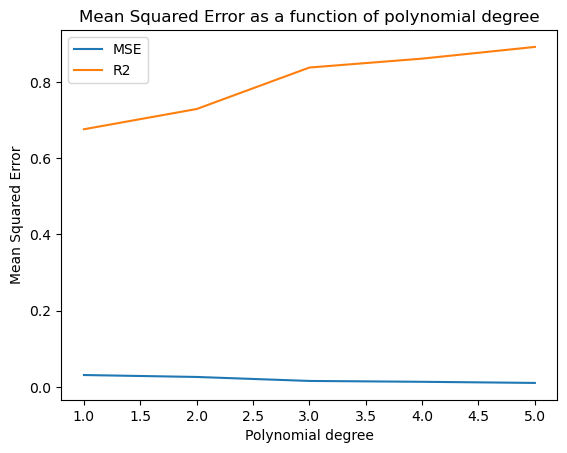

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
# Get the FrankeFunction. Using the function provided in the project description.

# Using the standard scaler which scales the data to have mean 0 and variance 1.
# splitting using the train_test_split function from sklearn
# Frankes function is given by the equation below.
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

# Generate the data
np.random.seed(42)
n = 1000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
noise = 0.1*np.random.normal(0, 1, n)
Z = FrankeFunction(x, y) + noise

# Scaling of our data.
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x.reshape(-1,1))
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

x_combined = np.hstack((x_scaled, y_scaled))

# Split the data into training and test data
x_train, x_test, z_train, z_test = train_test_split(x_combined, Z, test_size=0.2)


def prep_poly_feartures(x, degree):
  poly = PolynomialFeatures(degree)
  X_poly = poly.fit_transform(x)
  return X_poly


def poly_regression_and_mse(degree, X_train, z_train, x_test, z_test):
  X_poly_train = prep_poly_feartures(X_train, degree)
  model = LinearRegression()
  model.fit(X_poly_train, z_train)

  x_poly_test = prep_poly_feartures(x_test, degree)
  z_pred = model.predict(x_poly_test)
  
  betas = model.coef_
  # Using mse and r2 from sklearn for consistensy and accuracy.
  mse = mean_squared_error(z_test, z_pred)
  r2 = r2_score(z_test, z_pred)
  
  return mse, r2, betas
  
mse_results = {}
r2_result = {}
beta_values = []

for degree in range(1,6):
  mse, r2, beta = poly_regression_and_mse(degree, x_train, z_train, x_test, z_test)
  mse_results[degree] = mse
  r2_result[degree] = r2
  beta_values.append(beta)

print(beta_values)

plt.figure()

plt.plot(list(mse_results.keys()), list(mse_results.values()), label="MSE")
plt.plot(list(r2_result.keys()), list(r2_result.values()), label="R2")
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error as a function of polynomial degree')
plt.legend()
plt.show()
plt.figure()



## Observations.
Both the error metrics, mse and r2, are moving in the desired direction. From the plot the mse is moving towards 0 which is what we want. The closer it gets to zero, the better the fit, which is the trend in our case. We also notice that the fit gets better when we increase the complexity of out model. When we increase the polynomial degree, we introduce higher flexibility and a better ability to learn more complex patterns.

We also notice that r2 is moving towards 1, which is what we want. Much of the same we discussed above, applies to the r2 score. Higher complexity allows more flexibility and the model can better capture variability in the data, as well as more complex patterns.

citation: HASTIE et.al

[[ 0.         -0.14174604 -0.19621295  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.14269725 -0.19517734  0.00511508  0.06781977 -0.02607432
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.14382736 -0.40173048  0.00295949  0.06878015 -0.02727628
   0.02314419  0.01199799 -0.04396072  0.1099821   0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.14875188 -0.40665337  0.21537245  0.13702262  0.04150261
   0.02782387  0.0142123  -0.04278205  0.1110071  -0.08030227 -0.04111813
  -0.01324701  0.00325259 -0.02197592  0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.115

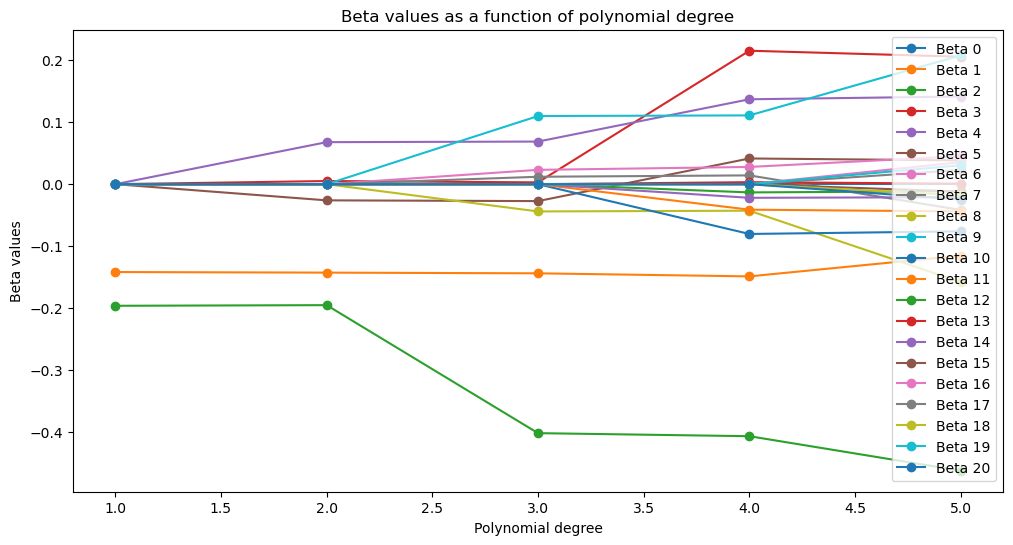

In [21]:
max_len = max(len(b) for b in beta_values)

# Pad the shorter beta arrays with zeros so they all have the same length
beta_values_padded = np.array([np.pad(b, (0, max_len - len(b)), 'constant') for b in beta_values])
plt.figure(figsize=(12,6))

print(beta_values_padded)


for i in range(beta_values_padded.shape[1]):
    plt.plot(range(1,6), beta_values_padded[:, i], marker='o', label=f'Beta {i}')

plt.xlabel('Polynomial degree')
plt.ylabel('Beta values')
plt.title('Beta values as a function of polynomial degree')

plt.legend()
plt.show()



## Observations
As the growth follows a binomial expansion we get 21 different beta values, which is reasonable because 
$$d = degrees$$
$$ Num Of Terms = \frac{(d+2)(d+1)}{2}$$

As the model gets more complex we get an increase in the number of coefficients. 
And we also observe that when the polynomial degree increase, the beta values also increases. 
Some certain terms in the intermediate degrees have larger beta values. this could be to the models local peaks/dips.
We also notice that the beta's are centered around origin. This is most likely due to how the x and y values are distributed.

The signs of the coeffiecients fluctuate, which is typical for polynomial regression models, especially higher-order ones.

